# Quantum Process Tomography

In this notebook we will work through different tomography schemes, building up in complexity. With the ultimate goal to work towards Quantum Process Tomography.

*Contributors*: Boran Apak, Yorgos Sotiropoulos  and Joost van der Zalm (for the Quantum Information Project [AP3421]) 

## 1.a) Qubit State Tomography

First we will look at measuring a **single pure state**.

In [2]:
import numpy as np
import qiskit as qk
import math
from quantuminspire.qiskit import QI
from quantuminspire.credentials import save_account
save_account('7ff8243ba6d4643e4ec1774b7079f8086df7e872')
QI.set_authentication()
qi_backend = QI.get_backend('QX single-node simulator') # Possible options: 'QX single-node simulator', 'Spin-2', 'Starmon-5'

Experiment for measuring the expectation value in the X direction
      ┌───┐┌───┐┌──────────┐┌─┐
q0_0: ┤ H ├┤ T ├┤ RY(-π/2) ├┤M├
      └───┘└───┘└──────────┘└╥┘
c0: 1/═══════════════════════╩═
                             0 

State	Counts
0	225
1	31
The expected X value = 0.7578125
Experiment for measuring the expectation value in the Y direction
      ┌───┐┌───┐┌─────────┐┌─┐
q5_0: ┤ H ├┤ T ├┤ RX(π/2) ├┤M├
      └───┘└───┘└─────────┘└╥┘
c1: 1/══════════════════════╩═
                            0 

State	Counts
0	216
1	40
The expected Y value = 0.6875
Experiment for measuring the expectation value in the Z direction
       ┌───┐┌───┐┌─┐
q10_0: ┤ H ├┤ T ├┤M├
       └───┘└───┘└╥┘
 c2: 1/═══════════╩═
                  0 

State	Counts
0	117
1	139
The expected Z value = -0.0859375


After the experiments we find the following bloch vector [0.7578125, 0.6875, -0.0859375]


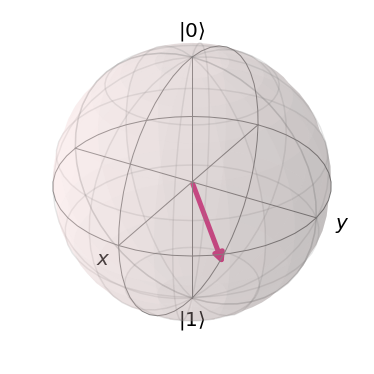

In [2]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(1)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.h(0)                      # Add a H gate on qubit 0, putting this qubit in superposition.
    circuit.t(0)                      # Add a T gate on qubit 0, rotating it by pi/4 around the z-axis
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q,c)              # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))
    
print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)

## 1.b) Qubit State Tomography
Second let's look at measuring a **Maximally mixed state**.

Experiment for measuring the expectation value in the X direction
       ┌───┐     ┌──────────┐┌─┐
q14_0: ┤ H ├──■──┤ RY(-π/2) ├┤M├
       └───┘┌─┴─┐└──────────┘└╥┘
q14_1: ─────┤ X ├─────────────╫─
            └───┘             ║ 
 c3: 1/═══════════════════════╩═
                              0 

State	Counts
0	123
1	133
The expected X value = -0.0390625
Experiment for measuring the expectation value in the Y direction
       ┌───┐     ┌─────────┐┌─┐
q19_0: ┤ H ├──■──┤ RX(π/2) ├┤M├
       └───┘┌─┴─┐└─────────┘└╥┘
q19_1: ─────┤ X ├────────────╫─
            └───┘            ║ 
 c4: 1/══════════════════════╩═
                             0 

State	Counts
0	130
1	126
The expected Y value = 0.015625
Experiment for measuring the expectation value in the Z direction
       ┌───┐     ┌─┐
q24_0: ┤ H ├──■──┤M├
       └───┘┌─┴─┐└╥┘
q24_1: ─────┤ X ├─╫─
            └───┘ ║ 
 c5: 1/═══════════╩═
                  0 

State	Counts
0	125
1	131
The expected Z value = -0.0234375


After the experiment

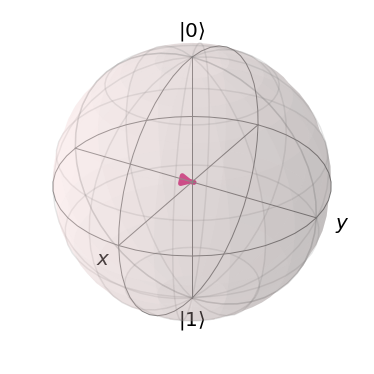

In [3]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(2)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.h(0)                      # Add a H gate on qubit 0, putting this qubit in superposition.
    circuit.cx(q[0], q[1])            # Add a control-X gate with qubit 0 the control, and qubit 1 the target
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q[0],c)           # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))

print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)

## 1.c) Qubit State Tomography
Third let's look at measuring an **Intermediate maximally mixed state**.

Experiment for measuring the expectation value in the X direction
       ┌──────────┐     ┌──────────┐┌─┐
q28_0: ┤ RY(-π/4) ├──■──┤ RY(-π/2) ├┤M├
       └──────────┘┌─┴─┐└──────────┘└╥┘
q28_1: ────────────┤ X ├─────────────╫─
                   └───┘             ║ 
 c6: 1/══════════════════════════════╩═
                                     0 

State	Counts
0	126
1	130
The expected X value = -0.015625
Experiment for measuring the expectation value in the Y direction
       ┌──────────┐     ┌─────────┐┌─┐
q32_0: ┤ RY(-π/4) ├──■──┤ RX(π/2) ├┤M├
       └──────────┘┌─┴─┐└─────────┘└╥┘
q32_1: ────────────┤ X ├────────────╫─
                   └───┘            ║ 
 c7: 1/═════════════════════════════╩═
                                    0 

State	Counts
0	117
1	139
The expected Y value = -0.0859375
Experiment for measuring the expectation value in the Z direction
       ┌──────────┐     ┌─┐
q37_0: ┤ RY(-π/4) ├──■──┤M├
       └──────────┘┌─┴─┐└╥┘
q37_1: ────────────┤ X ├─╫─
                  

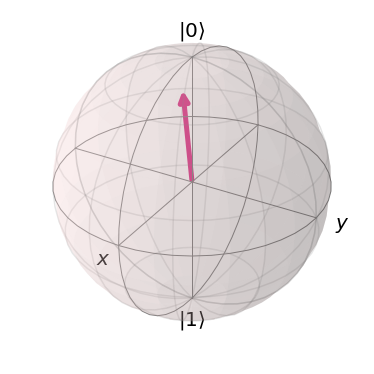

In [4]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(2)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.ry(-math.pi/4, q[0])      # Add a RY gate on qubit 0, putting this qubit in in intermediate state
    circuit.cx(q[0], q[1])            # Add a control-X gate with qubit 0 the control, and qubit 1 the target
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q[0],c)           # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))

print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)

## 1.d) Qubit State Tomography
Third let's look at measuring with an overcomplete set of inputs. Where we still apply some gates as 'process'.

Experiment for measuring the expectation value in the X direction
        ┌─────────────────┐┌─────────┐┌──────────┐┌─┐
q521_0: ┤ initialize(1,0) ├┤ RZ(π/5) ├┤ RY(-π/2) ├┤M├
        └─────────────────┘└─────────┘└──────────┘└╥┘
q521_1: ───────────────────────────────────────────╫─
                                                   ║ 
 c62: 1/═══════════════════════════════════════════╩═
                                                   0 

State	Counts
0	120
1	136
The expected X value = -0.0625 


Experiment for measuring the expectation value in the Y direction
        ┌─────────────────┐┌─────────┐┌─────────┐┌─┐
q527_0: ┤ initialize(1,0) ├┤ RZ(π/5) ├┤ RX(π/2) ├┤M├
        └─────────────────┘└─────────┘└─────────┘└╥┘
q527_1: ──────────────────────────────────────────╫─
                                                  ║ 
 c63: 1/══════════════════════════════════════════╩═
                                                  0 

State	Counts
0	140
1	116
The expected Y value = 0.09375 




State	Counts
0	206
1	50
The expected X value = 0.609375 


Experiment for measuring the expectation value in the Y direction
        ┌───────────────────────────────┐┌─────────┐┌─────────┐┌─┐
q647_0: ┤ initialize(0.70711,-0.70711j) ├┤ RZ(π/5) ├┤ RX(π/2) ├┤M├
        └───────────────────────────────┘└─────────┘└─────────┘└╥┘
q647_1: ────────────────────────────────────────────────────────╫─
                                                                ║ 
 c78: 1/════════════════════════════════════════════════════════╩═
                                                                0 

State	Counts
0	28
1	228
The expected Y value = -0.78125 


Experiment for measuring the expectation value in the Z direction
        ┌───────────────────────────────┐┌─────────┐┌─┐
q657_0: ┤ initialize(0.70711,-0.70711j) ├┤ RZ(π/5) ├┤M├
        └───────────────────────────────┘└─────────┘└╥┘
q657_1: ─────────────────────────────────────────────╫─
                                                     ║ 

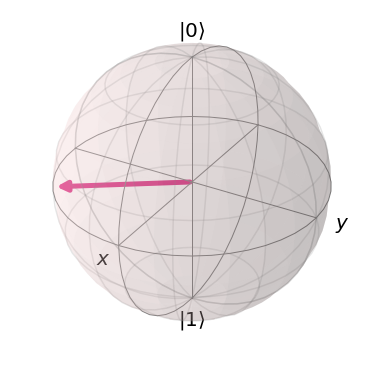

In [14]:
# The states we have here are the following: ['0', '1', '+', '-', 'i', '-i'] 
states = [np.array([1,0]),np.array([0,1]),1/np.sqrt(2) * np.array([1,1]), \
          1/np.sqrt(2) * np.array([1,-1]), 1/np.sqrt(2) * np.array([1, complex(0,1)]), 1/np.sqrt(2) * np.array([1, complex(0,-1)])]
possible_directions = ['X', 'Y', 'Z']
expected_values = np.zeros((6,3))

j=0
for initial_state in states:
    i=0
    for direction in possible_directions:
        print('Experiment for measuring the expectation value in the', direction, 'direction')

        ## Setting up experiment
        q = qk.QuantumRegister(2)         # Create a Quantum register of 1 qubit
        c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit
        
        circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
        
        circuit.initialize(initial_state, 0)  # Initialize the 0th qubit using a complex vector
            
        
        circuit.rz(math.pi/5,0)           # Rotate by pi/5 around the z-axis
    
        if direction == 'X' : 
            circuit.ry(-math.pi/2, 0)
        elif direction == 'Y' : 
            circuit.rx(math.pi/2, 0)
        circuit.measure(q[0],c)           # Do a measurement in the standard basis
        print(circuit)                    # Circuit can simply be printed in this way

        ## Measuring the the expected value
        number_of_shots = 256
        qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
        qi_result = qi_job.result()
        histogram = qi_result.get_counts(circuit)
        print('\nState\tCounts')
        expected_value = 0
        for state, counts in histogram.items():
            print('{0}\t{1}'.format(state, counts))
            expected_value += (-1)**int(state) * int(counts)
        expected_values[j,i] = expected_value / number_of_shots
        print('The expected', direction, 'value =', str(expected_values[j,i]),'\n\n')
        i += 1 
    j += 1

qk.visualization.plot_bloch_vector(expected_values[0])
qk.visualization.plot_bloch_vector(expected_values[1])
qk.visualization.plot_bloch_vector(expected_values[2])
qk.visualization.plot_bloch_vector(expected_values[3])
qk.visualization.plot_bloch_vector(expected_values[4])
qk.visualization.plot_bloch_vector(expected_values[5])

## 2 Qubit State Tomography
When looking at Qubit State Tomography for 2 qubits we find that there are 16 different correlations that we could measure.

| Q0 \| Q1           | I              | X              | Y              | Z              |
|:------------------:|:--------------:|:--------------:|:--------------:|:--------------:|
| I                  | \&lt; II \&gt; | \&lt; IX \&gt; | \&lt; IY \&gt; | \&lt; IZ \&gt; |
| X                  | \&lt; XI \&gt; | \&lt; XX \&gt; | \&lt; XY \&gt; | \&lt; XZ \&gt; |
| Y                  | \&lt; YI\&gt;  | \&lt; YX \&gt; | \&lt; YY \&gt; | \&lt; YZ \&gt; |
| Z                  | \&lt; ZI\&gt;  | \&lt; ZX \&gt; | \&lt; ZY \&gt; | \&lt; ZZ \&gt; |
    

In [10]:
expectations = np.zeros((4, 4))
expectations[0,0] = 1

i=0
possible_directions = ['I', 'X','Y', 'Z']

for direction1 in possible_directions:
    j=0
    for direction2 in possible_directions:
        
        combined_directions = direction1 + direction2
        if combined_directions == 'II' : continue  # For the II case we don't need a circuit
        print("Let's find the expectation value for the", direction1, direction2, 'measurements')
        
        # Define circuit
        q = qk.QuantumRegister(2)
        c = qk.ClassicalRegister(2)
        circuit = qk.QuantumCircuit(q, c)
        circuit.h(q[0])
        circuit.cx(q[0], q[1])
        
        # Rotate to make measurements in different bases
        if direction1 == 'X' : 
            circuit.ry(-math.pi/2, q[0])
        elif direction1 == 'Y' : 
            circuit.rx(math.pi/2, q[0])
        if direction2 == 'X' : 
            circuit.ry(-math.pi/2, q[1])
        elif direction2 == 'Y' : circuit.rx(math.pi/2, q[1])
        
        if direction1 == 'I': 
            circuit.measure(q[1], c[1]) # The first bit doesn't need to be measured
        elif direction2 == 'I': 
            circuit.measure(q[0], c[0]) # The second bit doesn't need to be measured
        else : 
            circuit.measure(q, c)    # Now we want to measure both bits
        
        #print(circuit)  # To shorten run-time this can be left out
        
        # Define the experiment
        number_of_shots = 512
        qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
        qi_result = qi_job.result()
        
        # Look at the results
        histogram = qi_result.get_counts(circuit)
        print('\nState\tCounts')
        
        # Add the results to the results matrix
        expected_value = 0
        if direction1 == 'I':   # If one of the qubits isn't measured the calculation changes a little bit
            for state, counts in histogram.items() :
                print('{0}\t{1}'.format(state, counts))
                expected_value += (-1)**int(state[1]) * int(counts)
        elif direction2 == 'I':
            for state, counts in histogram.items() :
                print('{0}\t{1}'.format(state, counts))
                expected_value += (-1)**int(state[0]) * int(counts)
        else:
            for state, counts in histogram.items() :
                print('{0}\t{1}'.format(state, counts))
                expected_value += (-1)**(int(state[0])+int(state[1]))*int(counts)
            
        expected_value = expected_value / number_of_shots
        expectations[i,j] = expected_value
        print('For the', direction1, direction2, 'measurements, the expected value=', str(expected_value))
        print('\n')
    
        j += 1
    i += 1

print(expectations)

Let's find the expectation value for the I X measurements

State	Counts
00	264
10	248
For the I X measurements, the expected value= 1.0


Let's find the expectation value for the I Y measurements

State	Counts
00	259
10	253
For the I Y measurements, the expected value= 1.0


Let's find the expectation value for the I Z measurements

State	Counts
00	248
10	264
For the I Z measurements, the expected value= 1.0


Let's find the expectation value for the X I measurements

State	Counts
00	258
01	254
For the X I measurements, the expected value= 1.0


Let's find the expectation value for the X X measurements

State	Counts
00	259
11	253
For the X X measurements, the expected value= 1.0


Let's find the expectation value for the X Y measurements

State	Counts
00	131
01	138
10	116
11	127
For the X Y measurements, the expected value= 0.0078125


Let's find the expectation value for the X Z measurements

State	Counts
00	137
01	130
10	111
11	134
For the X Z measurements, the expected value= 0.0585

## 3 Qubit State Tomography for given states
 Let's see what happens if we try to feed cardinal states before the process

In [12]:
expectations = np.zeros((4, 4))
expectations[0,0] = 1


possible_inputs = ['0', '1', '+', '-', 'i', '!'] # Where ! is the conventional -i (but now using only 1 char)
possible_directions = ['I', 'X','Y', 'Z']
k=0
for input1 in possible_inputs:
    l=0
    for input2 in possible_inputs:
        i=0
        for direction1 in possible_directions:
            j=0
            for direction2 in possible_directions:

                combined_directions = direction1 + direction2
                if combined_directions == 'II' : continue  # For the II case we don't need a circuit
                print("Let's find the expectation value for the", direction1, direction2, 'measurements')

                # Define circuit
                q = qk.QuantumRegister(2)
                c = qk.ClassicalRegister(2)
                circuit = qk.QuantumCircuit(q, c)
                
                # Do some initialization for the input states
                if input1 == '1':
                    circuit.x(q[0])
                elif input1 == '+':
                    circuit.h(q[0])
                elif input1 == '-':
                    circuit.x(q[0])
                    circuit.h(q[0])
                elif input1 == 'i':
                    circuit.h(q[0])
                    circuit.s(q[0])
                elif input1 == '!':
                    circuit.h(q[0])
                    circuit.sdag(q[0])
                    
                # The gates for the process
                circuit.h(q[0])
                circuit.cx(q[0], q[1])

                # Rotate to make measurements in different bases
                if direction1 == 'X' : 
                    circuit.ry(-math.pi/2, q[0])
                elif direction1 == 'Y' : 
                    circuit.rx(math.pi/2, q[0])
                if direction2 == 'X' : 
                    circuit.ry(-math.pi/2, q[1])
                elif direction2 == 'Y' : circuit.rx(math.pi/2, q[1])

                if direction1 == 'I': 
                    circuit.measure(q[1], c[1]) # The first bit doesn't need to be measured
                elif direction2 == 'I': 
                    circuit.measure(q[0], c[0]) # The second bit doesn't need to be measured
                else : 
                    circuit.measure(q, c)    # Now we want to measure both bits

                print(circuit)  # To shorten run-time this can be left out

                # Define the experiment
                number_of_shots = 512
                qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
                qi_result = qi_job.result()

                # Look at the results
                histogram = qi_result.get_counts(circuit)
                #print('\nState\tCounts')  # To shorten run-time this can be left out

                # Add the results to the results matrix
                expected_value = 0
                if direction1 == 'I':   # If one of the qubits isn't measured the calculation changes a little bit
                    for state, counts in histogram.items() :
                        #print('{0}\t{1}'.format(state, counts))  # To shorten run-time this can be left out
                        expected_value += (-1)**int(state[1]) * int(counts)
                elif direction2 == 'I':
                    for state, counts in histogram.items() :
                        #print('{0}\t{1}'.format(state, counts))  # To shorten run-time this can be left out
                        expected_value += (-1)**int(state[0]) * int(counts)
                else:
                    for state, counts in histogram.items() :
                        #print('{0}\t{1}'.format(state, counts))  # To shorten run-time this can be left out
                        expected_value += (-1)**(int(state[0])+int(state[1]))*int(counts)

                expected_value = expected_value / number_of_shots
                expectations[i,j] = expected_value
                print('For the', direction1, direction2, 'measurements, the expected value=', str(expected_value))
                print('\n')

                j += 1
            i += 1
        l += 1
    k += 1

print(expectations)

Let's find the expectation value for the I X measurements
        ┌───┐                    
q417_0: ┤ H ├──■─────────────────
        └───┘┌─┴─┐┌──────────┐┌─┐
q417_1: ─────┤ X ├┤ RY(-π/2) ├┤M├
             └───┘└──────────┘└╥┘
 c85: 2/═══════════════════════╩═
                               1 
For the I X measurements, the expected value= 1.0


Let's find the expectation value for the I Y measurements
        ┌───┐                   
q422_0: ┤ H ├──■────────────────
        └───┘┌─┴─┐┌─────────┐┌─┐
q422_1: ─────┤ X ├┤ RX(π/2) ├┤M├
             └───┘└─────────┘└╥┘
 c86: 2/══════════════════════╩═
                              1 
For the I Y measurements, the expected value= 1.0


Let's find the expectation value for the I Z measurements
        ┌───┐        
q427_0: ┤ H ├──■─────
        └───┘┌─┴─┐┌─┐
q427_1: ─────┤ X ├┤M├
             └───┘└╥┘
 c87: 2/═══════════╩═
                   1 
For the I Z measurements, the expected value= 1.0


Let's find the expectation value for the X I me

For the Y Y measurements, the expected value= -1.0


Let's find the expectation value for the Y Z measurements
        ┌───┐     ┌─────────┐┌─┐
q542_0: ┤ H ├──■──┤ RX(π/2) ├┤M├
        └───┘┌─┴─┐└───┬─┬───┘└╥┘
q542_1: ─────┤ X ├────┤M├─────╫─
             └───┘    └╥┘     ║ 
c110: 2/═══════════════╩══════╩═
                       1      0 
For the Y Z measurements, the expected value= 0.05859375


Let's find the expectation value for the Z I measurements
        ┌───┐     ┌─┐
q547_0: ┤ H ├──■──┤M├
        └───┘┌─┴─┐└╥┘
q547_1: ─────┤ X ├─╫─
             └───┘ ║ 
c111: 2/═══════════╩═
                   0 
For the Z I measurements, the expected value= 1.0


Let's find the expectation value for the Z X measurements
        ┌───┐                 ┌─┐   
q551_0: ┤ H ├──■──────────────┤M├───
        └───┘┌─┴─┐┌──────────┐└╥┘┌─┐
q551_1: ─────┤ X ├┤ RY(-π/2) ├─╫─┤M├
             └───┘└──────────┘ ║ └╥┘
c112: 2/═══════════════════════╩══╩═
                               0  1 
For the Z X measur

For the X X measurements, the expected value= 1.0


Let's find the expectation value for the X Y measurements
        ┌───┐     ┌──────────┐┌─┐   
q663_0: ┤ H ├──■──┤ RY(-π/2) ├┤M├───
        └───┘┌─┴─┐├─────────┬┘└╥┘┌─┐
q663_1: ─────┤ X ├┤ RX(π/2) ├──╫─┤M├
             └───┘└─────────┘  ║ └╥┘
c135: 2/═══════════════════════╩══╩═
                               0  1 
For the X Y measurements, the expected value= 0.04296875


Let's find the expectation value for the X Z measurements
        ┌───┐     ┌──────────┐┌─┐
q669_0: ┤ H ├──■──┤ RY(-π/2) ├┤M├
        └───┘┌─┴─┐└───┬─┬────┘└╥┘
q669_1: ─────┤ X ├────┤M├──────╫─
             └───┘    └╥┘      ║ 
c136: 2/═══════════════╩═══════╩═
                       1       0 
For the X Z measurements, the expected value= 0.03125


Let's find the expectation value for the Y I measurements
        ┌───┐     ┌─────────┐┌─┐
q674_0: ┤ H ├──■──┤ RX(π/2) ├┤M├
        └───┘┌─┴─┐└─────────┘└╥┘
q674_1: ─────┤ X ├────────────╫─
             └───┘            

KeyboardInterrupt: 